In [138]:
# https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_EURKRW&page=5
# https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_JPYKRW&page=6
%pip install html5lib

In [139]:
# pandas 이용
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

code_in = int(input("통화유형 선택(1:USD, 2:EUR, 3:JPY)"))
currency_symbols = ["USD", "EUR", "JPY"]
currency_names = ['미국 달러', '유럽 연합 유로', '일본 엔화(100)'] 
code = currency_symbols[code_in-1]

df = pd.DataFrame()

for page_num in range(1, 11) :
    base_url = f"https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_{code}KRW&page={page_num}"
    temp = pd.read_html(base_url, encoding="cp949", header=1)
    
    df = pd.concat([df, temp[0]])
    
print(f"==={currency_names[code_in-1]}({code})===")
print(df.head())

===미국 달러(USD)===
           날짜   매매기준율  전일대비     사실 때     파실 때   보내실 때   받으실 때
0  2024.06.27  1386.6   7.9  1410.86  1362.34  1400.1  1373.1
1  2024.06.26  1394.5   2.5  1418.90  1370.10  1408.1  1380.9
2  2024.06.25  1392.0   4.0  1416.36  1367.64  1405.6  1378.4
3  2024.06.24  1388.0   3.0  1412.29  1363.71  1401.6  1374.4
4  2024.06.21  1391.0   1.0  1415.34  1366.66  1404.6  1377.4


In [140]:
# 원하는 열만 선택
df_total = df[['날짜', '매매기준율', '사실 때', '파실 때', '보내실 때', '받으실 때']]

df_total_chart = df_total.copy()
# pd.to_datetime(str(df['날짜']))
# df_total = df[['날짜', '매매기준율']]

In [141]:
df_total_chart = df_total_chart.set_index('날짜')

In [142]:
# 최신 데이터와 과거 데이터의 순서를 바꿈, 역순으로 표시함
df_total_chart = df_total_chart[::-1]

In [143]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

<Axes: title={'center': 'exchange rate'}, xlabel='날짜'>

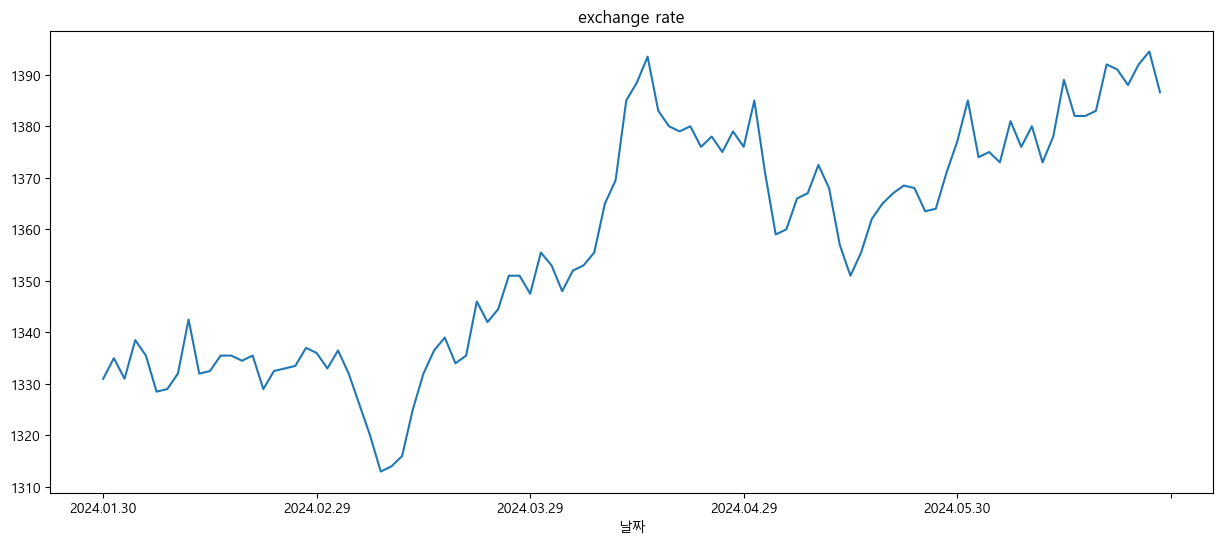

In [144]:
df_total_chart['매매기준율'].plot(figsize=(15,6),title='exchange rate')

### 월별 검색

In [146]:
# 날짜 열 형변환 (문자열 --> 날짜형식)
df_total['날짜'] = df_total['날짜'].str.replace('.', '').astype('datetime64[ms]')

In [149]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      100 non-null    datetime64[ms]
 1   매매기준율   100 non-null    float64       
 2   사실 때    100 non-null    float64       
 3   파실 때    100 non-null    float64       
 4   보내실 때   100 non-null    float64       
 5   받으실 때   100 non-null    float64       
dtypes: datetime64[ms](1), float64(5)
memory usage: 5.5 KB


In [150]:
# '월' 파생변수 생성
df_total['월'] = df_total['날짜'].dt.month

In [151]:
df_total

,날짜,매매기준율,사실 때,파실 때,보내실 때,받으실 때,월
0,2024-06-27,1386.6,1410.86,1362.34,1400.1,1373.1,6
1,2024-06-26,1394.5,1418.90,1370.10,1408.1,1380.9,6
2,2024-06-25,1392.0,1416.36,1367.64,1405.6,1378.4,6
3,2024-06-24,1388.0,1412.29,1363.71,1401.6,1374.4,6
4,2024-06-21,1391.0,1415.34,1366.66,1404.6,1377.4,6
...,...,...,...,...,...,...,...
5,2024-02-05,1335.5,1358.87,1312.13,1348.5,1322.5,2
6,2024-02-02,1338.5,1361.92,1315.08,1351.6,1325.4,2
7,2024-02-01,1331.0,1354.29,1307.71,1344.0,1318.0,2
8,2024-01-31,1335.0,1358.36,1311.64,1348.0,1322.0,1


In [180]:
month_in = int(input('검색할 월 입력'))
month_df = df_total.loc[(df_total['월']==month_in), ['날짜', '매매기준율', '사실 때', '파실 때', '보내실 때', '받으실 때']]

In [191]:
month_df = month_df[::-1].reset_index(drop=True)


In [192]:
month_df_chart = month_df.copy()

In [195]:
month_df_chart = month_df_chart.set_index('날짜')

<Axes: xlabel='날짜'>

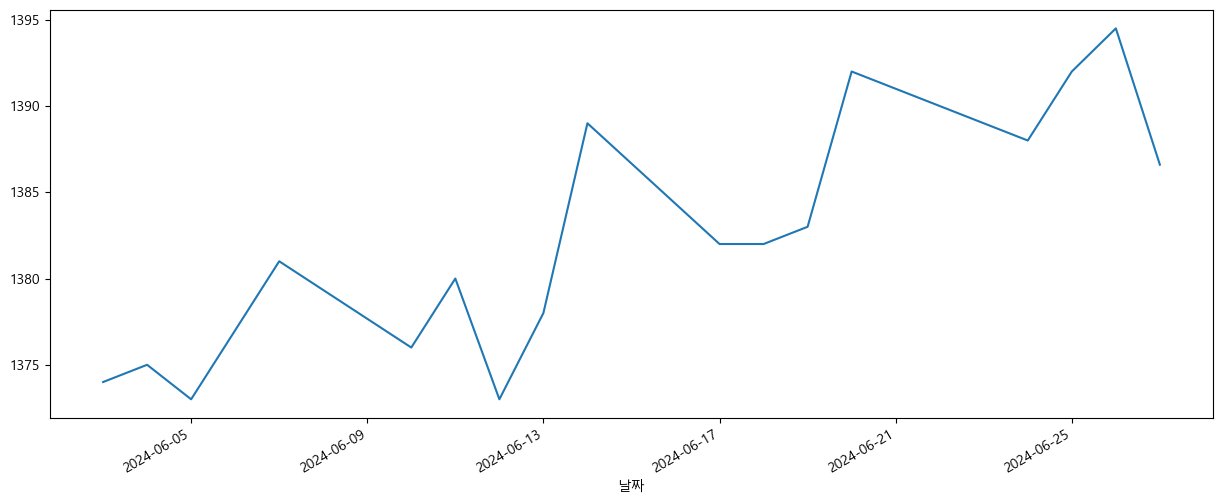

In [197]:
month_df_chart['매매기준율'].plot(figsize=(15,6))